In [2]:
from anytree import NodeMixin, RenderTree

class GraphNode(NodeMixin):  # Add Node feature
    def __init__(self, name, x1,x2,x3,y1,y2,y3, one=None, two=None,three=None,four=None):
        super(GraphNode, self).__init__()
        self.name = name
        self.x1 = x1
        self.x2 = x2
        self.x3 = x3
        self.y1 = y1
        self.y2 = y2
        self.y3 = y3
        
        self.one = one
        self.two = two
        self.three = three
        self.four = four
        


    
        
        



my0 = GraphNode('root',  0, 960,1920, 0, 540,1080)




In [17]:
from anytree import NodeMixin, RenderTree

class GraphNode(NodeMixin):  # Add Node feature
    def __init__(self, name, x1,x2,x3,y1,y2,y3, parent=None, children=None):
        super(GraphNode, self).__init__()
        self.name = name
        self.x1 = x1
        self.x2 = x2
        self.x3 = x3
        self.y1 = y1
        self.y2 = y2
        self.y3 = y3
        
        self.parent = parent
        if children:
            self.children = children
        


    
        
        



my0 = GraphNode('root',  0, 960,1920, 0, 540,1080)




In [44]:
from anytree.exporter import DotExporter

DotExporter(my0).to_picture("udo.png")


In [20]:
my0.children=[ GraphNode('rootp1',0,480,960,0,270,540), GraphNode('rootp2',961,1200,1920,541,750,1080)]

In [12]:
my0.one.name

'rootp1'

In [13]:
my0.two.name

'rootp2'

In [35]:
from anytree import Node, RenderTree,search
r = RenderTree(my0)

In [27]:
search.findall(my0, filter_=lambda node: node.x1 > 100)[0].name

'rootp2'

In [45]:
pt = (1500,900)

In [46]:
node = search.findall(my0, filter_=lambda node: ((node.x1 < pt[0] < node.x3) and (node.y1 < pt[1] < node.y3)))[-1]
node.name

'rootp3p2'

In [42]:
GraphNode('rootp3p2',1200,1600,1920,0,500,1080,parent = node)

In [36]:
GraphNode('rootp3',961,1200,1920,0,500,1080,parent = my0)

(<__main__.GraphNode at 0x7ff7a9447da0>,
 <__main__.GraphNode at 0x7ff7a99c55f8>)

In [48]:
import networkx as nx
graph_node_name = 'root'

G = nx.DiGraph()
G.add_node(graph_node_name+'p1')
G.add_node(graph_node_name+'p2')
G.add_node(graph_node_name+'p3')
G.add_node(graph_node_name+'p4')



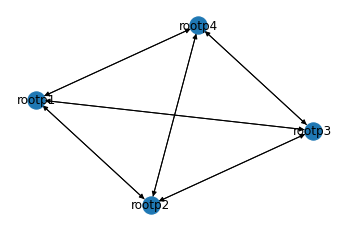

In [84]:
import matplotlib.pyplot as plt
subax1 = plt.subplot(111)

nx.draw(G, with_labels=True)

In [64]:
G.add_edges_from([('rootp1', 'rootp2'), ('rootp1','rootp1')])


In [68]:
lister = [i for i in G.nodes]

In [66]:
G.edges

OutEdgeView([('rootp1', 'rootp2'), ('rootp1', 'rootp1')])

In [73]:
import itertools

my_list = lister
edge_list = [ (pair[0],pair[1],{'weight':0.25}) for pair in itertools.product(my_list, repeat=2)]

In [74]:
edge_list

[('rootp1', 'rootp1', {'weight': 0.25}),
 ('rootp1', 'rootp2', {'weight': 0.25}),
 ('rootp1', 'rootp3', {'weight': 0.25}),
 ('rootp1', 'rootp4', {'weight': 0.25}),
 ('rootp2', 'rootp1', {'weight': 0.25}),
 ('rootp2', 'rootp2', {'weight': 0.25}),
 ('rootp2', 'rootp3', {'weight': 0.25}),
 ('rootp2', 'rootp4', {'weight': 0.25}),
 ('rootp3', 'rootp1', {'weight': 0.25}),
 ('rootp3', 'rootp2', {'weight': 0.25}),
 ('rootp3', 'rootp3', {'weight': 0.25}),
 ('rootp3', 'rootp4', {'weight': 0.25}),
 ('rootp4', 'rootp1', {'weight': 0.25}),
 ('rootp4', 'rootp2', {'weight': 0.25}),
 ('rootp4', 'rootp3', {'weight': 0.25}),
 ('rootp4', 'rootp4', {'weight': 0.25})]

In [75]:
G.add_edges_from(edge_list)

In [81]:
import numpy as np
np.mean( np.array([[1,2,3,4], [4,3,2,1] ]), axis=0 )

array([2.5, 2.5, 2.5, 2.5])

In [83]:
np.average( np.array([[1,2,3,4], [4,3,2,1] ]), axis=0, weights=[0.8, 0.2])

array([1.6, 2.2, 2.8, 3.4])

In [91]:
G.edges.data('weight')

OutEdgeDataView([('rootp1', 'rootp2', 1.25), ('rootp1', 'rootp1', 3.25), ('rootp1', 'rootp3', 0.25), ('rootp1', 'rootp4', 0.25), ('rootp2', 'rootp1', 0.25), ('rootp2', 'rootp2', 0.25), ('rootp2', 'rootp3', 0.25), ('rootp2', 'rootp4', 0.25), ('rootp3', 'rootp1', 0.25), ('rootp3', 'rootp2', 0.25), ('rootp3', 'rootp3', 0.25), ('rootp3', 'rootp4', 0.25), ('rootp4', 'rootp1', 0.25), ('rootp4', 'rootp2', 0.25), ('rootp4', 'rootp3', 0.25), ('rootp4', 'rootp4', 0.25)])

In [90]:
G.edges['rootp1','rootp2']['weight'] += 1

In [92]:
G.in_edges('rootp1')

InEdgeDataView([('rootp1', 'rootp1'), ('rootp2', 'rootp1'), ('rootp3', 'rootp1'), ('rootp4', 'rootp1')])

In [118]:
[(edge[0],G.edges[edge[0],edge[1]]['weight']) for edge in G.in_edges('rootp1')]

[('rootp1', 3.25), ('rootp2', 0.25), ('rootp3', 0.25), ('rootp4', 0.25)]

In [111]:
self_weight = G.edges['rootp1','rootp1']['weight']

In [110]:
G.in_degree('rootp1',weight = 'weight')

4.0

In [116]:
if self_weight*2 > G.in_degree('rootp1',weight = 'weight'):
    graph_node_name = 'rootp1'

    pG = nx.DiGraph()
    pG.add_node(graph_node_name+'p1')
    pG.add_node(graph_node_name+'p2')
    pG.add_node(graph_node_name+'p3')
    pG.add_node(graph_node_name+'p4')
    
    lister = [i for i in pG.nodes]
    my_list = lister
    edge_list = [ (pair[0],pair[1],{'weight':self_weight/16}) for pair in itertools.product(my_list, repeat=2)]
    pG.add_edges_from(edge_list)
    

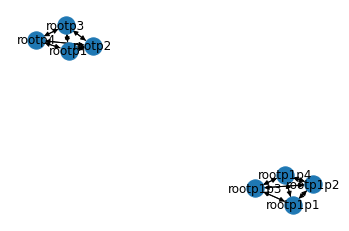

In [120]:
import matplotlib.pyplot as plt
subax1 = plt.subplot(111)

nx.draw(G, with_labels=True)

In [115]:
my_list

['rootp1p1', 'rootp1p2', 'rootp1p3', 'rootp1p4']

In [119]:
G.update(pG)